<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>


# WEKEO HYDROLOGY TRAINING

<div style="text-align: right"><i> INTERMEDIATE LEVEL </i></div>

***
<center><h1> Urban Studies: Examining city designs </h1></center>

***
**General Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top MENU (or keyboard shortcut `Shift` + `Enter`).<br>
<br>
**General Note 2**: If, for any reason, the kernel is not working anymore, in the top MENU, click on the <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Then, in the top MENU, click on "Run" and select "Run All Above Selected Cell".<br>

**General Note 3**: To explore more (Python and R) content, there is our [**Jupyter Catalogue**](https://notebooks.apps.mercator.dpi.wekeo.eu/), and if you seek support, there are plenty of useful resources in our [**Help Center**](https://help.wekeo.eu/en/). Feel free to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) ! <br>

***


# Table of contents
- [1. Introduction](#1.-Introduction)
- [2. Setting up the Python environment](#2.-Setting-up-the-Python-environment)
    - [2.1 Required Python modules](#2.1-Required-Python-modules)
- [3. Data Access](#3.-Data-Access)
    - [3.1. Presentation of the product used](#3.1.-Presentation-of-the-product-used)
    - [3.2. Retrieving the data](#3.2.-Retrieving-the-data)
- [4. Exploring the dataset](#4.-Exploring-the-dataset)
    - [4.1. Basic Manipulations](#4.1.-Basic-Manipulations)
    - [4.2. Intermediate Manipulations](#4.2.-Intermediate-Manipulations)
         - [4.2.1. Geospatial subsetting](#4.2.1.-Geospatial-subsetting)
         - [4.2.2. Drawing Chloropleth maps](#4.2.2.-Drawing-Chloropleth-maps)
- [5. Analysing the land use of Reykjavik and its neighborhood](#5.-Analysing-the-land-use-of-Reykjavik-and-its-neighborhood)
- [6. Case study : Proximity of the urban areas to green spaces](#6.-Case-study-:-Proximity-of-the-urban-areas-to-green-spaces)
- [7. Conclusion](#7.-Conclusion)
- [8. Exercises](#8.-Exercises)

# 1. Introduction

[Go back to the "Table of contents"](#Table-of-contents)

Urban studies is an interdisciplinary field of academic inquiry that focuses on understanding the various aspects of cities and urban areas. It encompasses a wide range of subjects related to urban life, development, and the challenges faced by cities. The field draws on insights from sociology, geography, economics, political science, environmental science, architecture, and other disciplines to provide a comprehensive understanding of urban phenomena. The key topics covered in urban studies include : urbanization, city planning, transportation, governance or social dynamics.

Remote sensing, involving the collection and interpretation of data from a distance, has emerged as a powerful tool in urban studies. Satellite imagery, aerial photography, and other remote sensing technologies provide a bird's-eye view of urban environments, enabling researchers to analyze spatial patterns, land use changes, and the expansion of urban footprints over time. This wealth of information aids urban planners, policymakers, and researchers in comprehending the spatial dimensions of urbanization and its impact on the environment.

One of the key contributions of remote sensing to urban studies lies in its ability to monitor and assess urban sprawl and land use transformations. This is crucial for managing urban growth, optimizing land use, and mitigating the environmental impact of expanding cities. Remote sensing data allows for the identification of trends such as changes in vegetation, alterations in infrastructure, and the encroachment on natural ecosystems, facilitating evidence-based urban planning and sustainable development practices.




| <img src="imgs/Reykjavik.png" width="600"> | 
|:--:| 
|  View from Hallgrímskirkja. From [Wikipedia](https://commons.wikimedia.org/wiki/File:View_from_Hallgr%C3%ADmskirkja_2.JPG) |




In this training, you will learn to retrieve, open and visualize data from the WEkEO data portal, in order to study the urban design of Reykjavik.

# 2. Setting up the Python environment
[Go back to the "Table of contents"](#Table-of-contents)

## 2.1 Required Python modules
[Go back to the "Table of contents"](#Table-of-contents)

The Jupyter Notebook must be set up with all the necessary available tools from the Jupyter Notebook ecosystem. Make sure to select the **"miniwekeolab"** kernel, which has all the necessary libraries already pre-installed. Here is the list of the modules we will be using in this exercise.

| Module name | Description |
| :---: | :---|
| **numpy** | [NumPy](https://numpy.org/) is the fundamental package for scientific computing with Python and for managing ND-arrays. |
| **matplotlib** |[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library which produces high quality figures. |
| **cartopy** |[Cartopy](https://scitools.org.uk/cartopy/docs/latest/) is a library for plotting maps and geospatial data analyses in Python. |
|**geopandas**|[Geopandas](https://geopandas.org/en/stable/) is a library that allows spatial operation on geometric data.|

In [1]:
# install the necessary packages
%pip install numpy 
%pip install matplotlib 
%pip install scipy 
%pip install pandas  
%pip install cartopy  # install cartopy
%pip install geopandas  # install geopandas
%pip install xarray  # install xarray
%pip install shapely  # install shapely


%pip install hda -U 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [2]:
# Modules system
import warnings
warnings.filterwarnings('ignore')
import getpass
import os
from pathlib import Path

# Modules related to data retrieving
from hda import Client
import json

# Modules related to plot and EO data manipulation
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.patches as mpatches


import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import geopandas as gpd
from shapely.geometry import box, Polygon, MultiPolygon
from fiona.crs import from_epsg
import fiona
from cartopy.io.img_tiles import OSM, GoogleTiles

import rasterio
from rasterio.mask import mask

# 3. Data Access

[Go back to the "Table of contents"](#Table-of-contents)


## 3.1. Presentation of the product used

[Go back to the "Table of contents"](#Table-of-contents)


From the WEkEO [Data Viewer](https://www.wekeo.eu/data?view=viewer), you can explore all the products available with many filters to select the region you are interested in, the parameters you want to study, etc.

In this training, we are going to use the [COPERNICUS Urban Atlas](https://www.wekeo.eu/data?view=dataset&dataset=EO%3ACLMS%3ADAT%3AURBAN-ATLAS) product. It represents a pioneering effort to provide detailed and consistent land cover and land use information for urban areas across Europe. Leveraging advanced remote sensing technologies and satellite imagery, the atlas offers high-resolution maps and time-series data for a wide array of European cities. Focused on key thematic layers such as residential, industrial, and green spaces, the Copernicus Urban Atlas serves as a valuable resource for urban planners, policymakers, and researchers, facilitating evidence-based decision-making and sustainable urban development. By fostering accessibility and collaboration through open data, this initiative contributes significantly to the broader Copernicus goal of utilizing Earth observation data to address societal, environmental, and economic challenges.

|   | COPERNICUS Urban Atlas |
| :---: | :---|
| **Variables used** | Urban Atlas 2018 |
| **Product identifier** |[EO:CLMS:DAT:URBAN-ATLAS](https://www.wekeo.eu/data?view=dataset&dataset=EO%3ACLMS%3ADAT%3AURBAN-ATLAS) |
|**Minimum mapping width**| 10 m between two objects for distinct mapping|
| **Temporal resolution** | 6 years |
| **Temporal coverage** | 2006 - 2012 - **2018** |


<center>
    <img src="imgs/UA_thb.png" width="300">
</center>

You can also visit the [Copernicus page](https://land.copernicus.eu/en/products/urban-atlas) dedicated to the product to see more detail about the product and all the other maps available, such as land cover change maps.

## 3.2. Retrieving the data

[Go back to the "Table of contents"](#Table-of-contents)

There are many ways to [download data in WEkEO](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). You can do it manually from the [Data Viewer](https://www.wekeo.eu/data?view=viewer), but here we will download data through Python, using the Harmonized Data Access (HDA) API provided by WEkEO. The HDA client provides a fully compliant Python3 client that can be used to search and download products using the Harmonized Data Access WEkEO API.


First you need to make sure you have a `.hdarc` saved in your root directory. Follow the method described [here](https://help.wekeo.eu/en/articles/6751608-what-is-the-hda-api-python-client-and-how-to-use-it#h_e1d774cae9). 

📌 **Note**: For the sake of convenience, you can run the following cell to generate it automatically:

In [30]:
# Regulat users, local configuration
# Default location expected by hda package
hdarc = Path(Path.home() / '.hdarc')

# Create it only if it does not already exists
if not hdarc.is_file():
    USERNAME = input('Enter your username: ')
    PASSWORD = getpass.getpass('Enter your password: ')

    with open(Path.home() / '.hdarc', 'w') as f:
        f.write(f'user:{USERNAME}\n')
        f.write(f'password:{PASSWORD}\n')

In [ ]:
# Initialize the Data Access client, unregular users
from hda import Client, Configuration

# Configure user's credentials without a .hdarc
conf = Configuration(user = "hrabalikovanatt", password = "Sk@738586")
hda_client = Client(config = conf)

You are now ready to download data. We write the API request, i.e. specify which product we want, which parameters, etc. The request we have used to download the data can be found in the `data` folder, file `data/ERA5_req.json`. You can read it and modify it by right clicking on the file and then selecting "Open With -> Editor".

To write a new request, the easiest way is to select your data parameters in the [WEkEO Data Explorer](https://www.wekeo.eu/data), click on [`Show API request` (HowTo)](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data#h_a1de0507c1), and copy/paste it in a file (or directly in a notebook cell).

<center>
    <img src="imgs/data_req.png" width="300">
</center>

Let's visualize our request.


In [31]:
# Loading request from json file
with open('./data/UA_2018_req.json', 'r') as f:
    data = json.load(f)
data

{'dataset_id': 'EO:CLMS:DAT:URBAN-ATLAS',
 'product_type': 'Urban Atlas 2018',
 'version': 'Unspecified'}

Running the next cell will launch [**the downloading of the data (more details)**](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). Depending on the product and request, it may take some time.

📌 **Note**: In this training, the products are already downloaded and stored in the `data` folder, so **it is not necessary to run the next cell**.

In [32]:
## Instantiate the Harmonized Data Access (HDA) API
c = Client()

# Accept terms if not yet done
#c.accept_tac()

## Path to local data storage
output_path = 'data/'

data = {
  "dataset_id": "EO:CLMS:DAT:URBAN-ATLAS",
  "product_type": "Urban Atlas 2018",
  "version": "Unspecified",
  "itemsPerPage": 200,
  "startIndex": 0
}

## Run the search with query locally defined
# matches = c.search(data)

## Run the search with query wekeo jupyter lab defined
matches = hda_client.search(data)


## Print results
print(matches)



SearchResults[items=786,volume=37.1GB]


📌 **Note**: the request for the Urban Atlas should yield several hundreds results, i.e. one for each city represented in the dataset. Make sure to only download a **single city** ! 

In [33]:
## Store results to local data storage

city_nb = 376
matches[city_nb].download(output_path)

Lets extract the zip file 

In [7]:
import zipfile
import os

# Define the path to your ZIP file
zip_file_path = 'data/IS001L1_REYKJAVIK_UA2018_v013.zip'

# Define the directory where you want to extract the files
extract_to = 'data/'

# Create the extract directory if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Open the ZIP file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f'Files extracted to {extract_to}')

Files extracted to data/


# 4. Exploring the dataset

[Go back to the "Table of contents"](#Table-of-contents)


## 4.1. Basic Manipulations

[Go back to the "Table of contents"](#Table-of-contents)


For this training, we have already pre-downloaded and unzipped the Reykjavik Urban Atlas from 2012. The data directory is located here : `data/IS001L1_REYKJAVIK_UA2018_v013/Data`

The Urban Atlas consists in a *GeoPackage* file. They are similar to shapefiles : commonly used to store geospatial information. they can be composed of several layers, let's see how many there are in this file:

In [8]:
import os

def find_file(filename, search_path):
    """
    Recursively searches for the file in the given search_path directory.
    
    Parameters:
    filename (str): The name of the file to search for.
    search_path (str): The directory to search within.
    
    Returns:
    str: The full path to the file if found, else None.
    """
    for root, dirs, files in os.walk(search_path):
        if filename in files:
            return os.path.join(root, filename)
    return None

# Define the folder to search in (relative path to 'data' folder)
search_folder = 'data'

# The file to search for
file_to_find = 'IS001L1_REYKJAVIK_UA2018_v013.gpkg'

# Get the full path to the file
file_path = find_file(file_to_find, search_folder)

if file_path:
    print(f"File found: {file_path}")
else:
    print("File not found.")


for layername in fiona.listlayers(file_path):
    with fiona.open(file_path, layer=layername) as src:
        print(layername, len(src))

File found: data\IS001L1_REYKJAVIK_UA2018_v013\Data\IS001L1_REYKJAVIK_UA2018_v013.gpkg
IS001L1_REYKJAVIK_UA2018 12747
IS001L1_REYKJAVIK_UA2018_Boundary 1
IS001L1_REYKJAVIK_UA2018_UrbanCore 1


We have 3 layers :
*   One containing 70 672 objects. This should be the layer containing most of the useful information from the dataset.
*   One called 'Boundary' containing only 1 object : it probably represents the spatial boundaries of the dataset.
*   One called 'UrbanCore' containing only 1 object : it probably delimits a more restricted area within the dataset.

Let's now open the 3 layers separately using **geopandas** !

In [9]:
urban_core = gpd.read_file(file_path,
                           layer='IS001L1_REYKJAVIK_UA2018_UrbanCore').to_crs(epsg=4326)
bound = gpd.read_file(file_path,
                      layer='IS001L1_REYKJAVIK_UA2018_Boundary').to_crs(epsg=4326)
gdf = gpd.read_file(file_path,
                    layer='IS001L1_REYKJAVIK_UA2018').to_crs(epsg=4326)


Our new variables are *geodatasets*. They are very simple to visualise, you only have to call the function *"plot"*. Let's have a look:

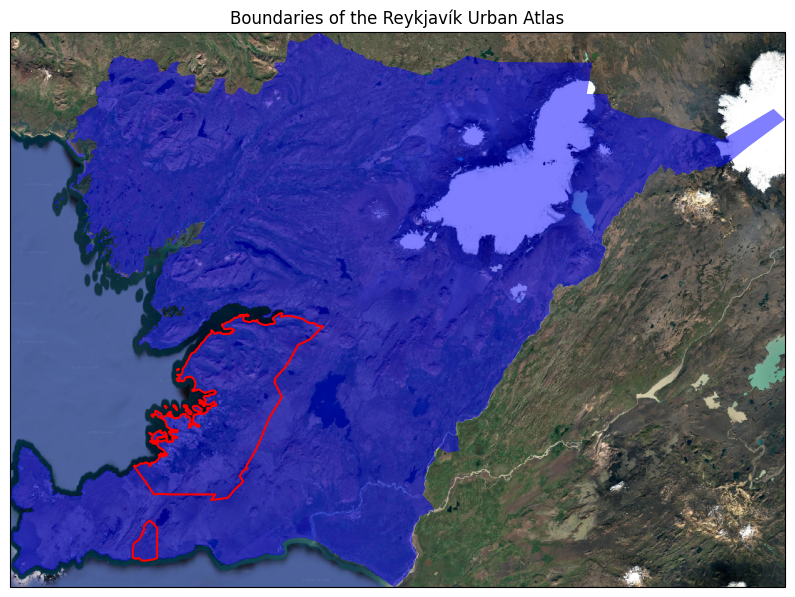

In [10]:
f = plt.figure(figsize=(10, 10))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())                                       # create an ax and select the projection of the map

extent = bound.geometry.bounds
ax.set_extent([extent.minx, extent.maxx, extent.miny, extent.maxy],crs=ccrs.PlateCarree())

imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 10)

# plotting the boundary dataset
bound.plot(ax=ax, color='b', alpha=0.5)

# plotting the contour of the urban core dataset
urban_core.boundary.plot(ax=ax, color='r')

ax.set_title('Boundaries of the Reykjavík Urban Atlas');


Now that we have an idea of the geographical extent of the data, we can start exploring the main dataset. Note that at this zoom level, we probably won't have a clear visiblity on the urban design of Reykjavik. Let's now define an area of interest around the more urbanized center of the city :



In [11]:
# define smaller area of interest
lon_min, lon_max, lat_min, lat_max = (-21.95, -21.80, 64.10, 64.15)

In [12]:
# exploring the dataset
print(len(gdf))
gdf.head() # head() displays only the first 5 rows

12747


,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
0,IS,Reykjavík,IS001L1,11220,Discontinuous medium density urban fabric (S.L...,2020-02,822-IS001L1,5092.226430,107890.968164,None,497,"MULTIPOLYGON (((-21.93818 64.06986, -21.93821 ..."
1,IS,Reykjavík,IS001L1,11220,Discontinuous medium density urban fabric (S.L...,2020-02,977-IS001L1,6194.522687,154323.855707,None,540,"MULTIPOLYGON (((-21.91276 64.09165, -21.91276 ..."
2,IS,Reykjavík,IS001L1,11220,Discontinuous medium density urban fabric (S.L...,2020-02,1354-IS001L1,401.445677,8074.128205,None,40,"MULTIPOLYGON (((-22.5591 64.0003, -22.56159 63..."
3,IS,Reykjavík,IS001L1,12100,"Industrial, commercial, public, military and p...",2020-02,5227-IS001L1,222.310796,3034.597075,None,0,"MULTIPOLYGON (((-21.01054 63.95265, -21.01006 ..."
4,IS,Reykjavík,IS001L1,11300,Isolated structures,2020-02,3998-IS001L1,254.002088,3915.600824,None,0,"MULTIPOLYGON (((-21.9756 64.0776, -21.97462 64..."


In the dataset, there are many polygons, each one of them having several characteristics : geometrical ones such as area or perimeter, but the most interesting in this training will be the *class_2012* class, which gives the type of area for each polygon.

We can select this particular column in the dataset with the following command :

In [13]:
gdf['class_2018']

0        Discontinuous medium density urban fabric (S.L...
1        Discontinuous medium density urban fabric (S.L...
2        Discontinuous medium density urban fabric (S.L...
3        Industrial, commercial, public, military and p...
4                                      Isolated structures
                               ...                        
12742    Herbaceous vegetation associations (natural gr...
12743    Herbaceous vegetation associations (natural gr...
12744    Herbaceous vegetation associations (natural gr...
12745    Herbaceous vegetation associations (natural gr...
12746    Herbaceous vegetation associations (natural gr...
Name: class_2018, Length: 12747, dtype: object

In [14]:
# printing all possible classes
np.unique(gdf['class_2018'])

array(['Airports', 'Arable land (annual crops)', 'Construction sites',
       'Continuous urban fabric (S.L. : > 80%)',
       'Discontinuous dense urban fabric (S.L. : 50% -  80%)',
       'Discontinuous low density urban fabric (S.L. : 10% - 30%)',
       'Discontinuous medium density urban fabric (S.L. : 30% - 50%)',
       'Discontinuous very low density urban fabric (S.L. : < 10%)',
       'Forests', 'Green urban areas',
       'Herbaceous vegetation associations (natural grassland, moors...)',
       'Industrial, commercial, public, military and private units',
       'Isolated structures', 'Land without current use',
       'Mineral extraction and dump sites',
       'Open spaces with little or no vegetation (beaches, dunes, bare rocks, glaciers)',
       'Other roads and associated land', 'Pastures', 'Port areas',
       'Sports and leisure facilities', 'Water', 'Wetlands'], dtype=object)

Above are all the possible classes found in the dataset. It is possible to subset the data based on a class value. For example let's select only the Urban Green Areas in Reykjavik :

In [15]:
# let's subset the dataset by selecting one class
gdf_green = gdf[gdf['class_2018']=='Green urban areas']

gdf_green.head()

,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
140,IS,Reykjavík,IS001L1,14100,Green urban areas,2020-02,7113-IS001L1,239.279168,3317.566157,None,0,"MULTIPOLYGON (((-21.91199 64.13955, -21.91159 ..."
173,IS,Reykjavík,IS001L1,14100,Green urban areas,2020-02,7120-IS001L1,278.797598,4496.181810,None,0,"MULTIPOLYGON (((-21.90503 64.13156, -21.90487 ..."
964,IS,Reykjavík,IS001L1,14100,Green urban areas,2020-02,7091-IS001L1,894.494840,24327.805776,None,0,"MULTIPOLYGON (((-21.84146 64.10606, -21.84127 ..."
965,IS,Reykjavík,IS001L1,14100,Green urban areas,2020-02,7092-IS001L1,976.863643,21708.677204,None,0,"MULTIPOLYGON (((-21.84127 64.10673, -21.84126 ..."
966,IS,Reykjavík,IS001L1,14100,Green urban areas,2020-02,7095-IS001L1,386.240944,8797.134483,None,0,"MULTIPOLYGON (((-21.84311 64.09778, -21.84272 ..."


Text(0.5, 1.0, 'Urban Green Areas in Reykjavík')

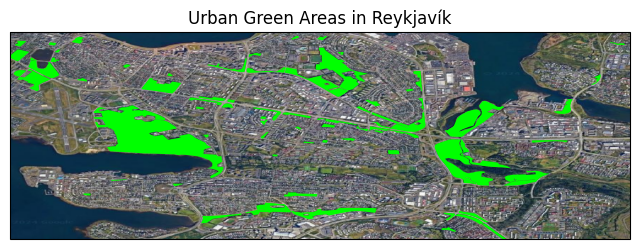

In [16]:
f = plt.figure(figsize=(8, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree()) 

ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())  # zooming on area of interest

imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 13)

gdf_green.plot(ax=ax, color='lime')
ax.set_title('Urban Green Areas in Reykjavík')

It is also possible to subset the dataset based on several class values. Let's select all the classes referring to the road network :

Text(0.5, 1.0, 'Road network in Reykjavík')

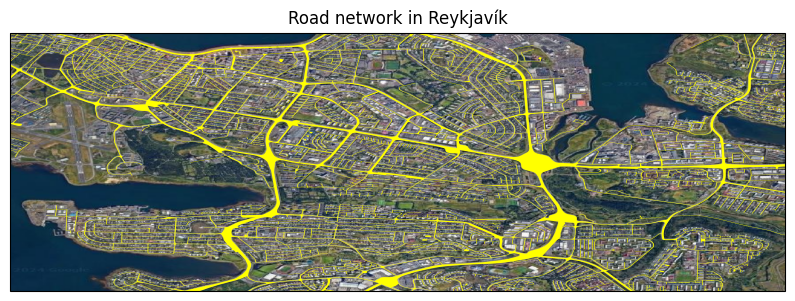

In [26]:
# let's plot the road network for instance !

gdf_st = gdf[gdf.class_2018.isin(['Fast transit roads and associated land',
                   'Other roads and associated land'])]

f = plt.figure(figsize=(10, 10))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())

imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 13)

gdf_st.plot(ax=ax, color='yellow')

ax.set_title('Road network in Reykjavík')

## 4.2. Intermediate Manipulations

[Go back to the "Table of contents"](#Table-of-contents)


### 4.2.1. Geospatial subsetting

[Go back to the "Table of contents"](#Table-of-contents)


We can subset the dataset by selecting only the polygons contained within a certain area. For instance let's select only the polygons located within the "urban core" boundaries :

In [18]:
# selecting only urban core areas :
# the polygons WITHIN the urban core boundaries will be selected
# it takes some time...

gdf_c = gdf[gdf.within(urban_core.geometry.unary_union)]

In [19]:
print(len(gdf_c))
gdf_c.head()

3028


,country,fua_name,fua_code,code_2018,class_2018,prod_date,identifier,perimeter,area,comment,Pop2018,geometry
0,IS,Reykjavík,IS001L1,11220,Discontinuous medium density urban fabric (S.L...,2020-02,822-IS001L1,5092.226430,107890.968164,None,497,"MULTIPOLYGON (((-21.93818 64.06986, -21.93821 ..."
1,IS,Reykjavík,IS001L1,11220,Discontinuous medium density urban fabric (S.L...,2020-02,977-IS001L1,6194.522687,154323.855707,None,540,"MULTIPOLYGON (((-21.91276 64.09165, -21.91276 ..."
4,IS,Reykjavík,IS001L1,11300,Isolated structures,2020-02,3998-IS001L1,254.002088,3915.600824,None,0,"MULTIPOLYGON (((-21.9756 64.0776, -21.97462 64..."
9,IS,Reykjavík,IS001L1,11210,Discontinuous dense urban fabric (S.L. : 50% -...,2020-02,279-IS001L1,4816.030998,108858.389327,None,786,"MULTIPOLYGON (((-21.98021 64.05515, -21.98113 ..."
10,IS,Reykjavík,IS001L1,11220,Discontinuous medium density urban fabric (S.L...,2020-02,946-IS001L1,3946.717842,104837.386149,None,1124,"MULTIPOLYGON (((-21.81732 64.10864, -21.81551 ..."


We have a lot less values ! We will visualize this dataset in the next section.

### 4.2.2. Drawing Chloropleth maps

[Go back to the "Table of contents"](#Table-of-contents)


With Geodatasets, it is possible to plot maps, where each polygon has a color determined by the value of an associated variable. For example, in the Urban Atlas dataset, a column gives an estimation of the population for some polygons. Let's plot the urban areas and highlight their population on a single map !

In [20]:
# the next analyses will be made over urban areas

gdf_c_urb = gdf_c[gdf_c.class_2018.isin(['Continuous urban fabric (S.L. : > 80%)',
                   'Discontinuous dense urban fabric (S.L. : 50% -  80%)',
                   'Discontinuous low density urban fabric (S.L. : 10% - 30%)',
                   'Discontinuous medium density urban fabric (S.L. : 30% - 50%)',
                   'Discontinuous very low density urban fabric (S.L. : < 10%)'])]

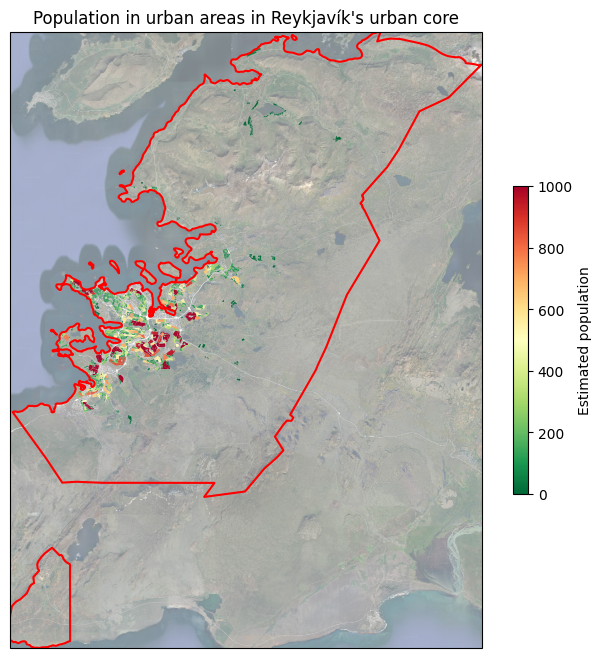

In [29]:
f = plt.figure(figsize=(8, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree()) 

extent = urban_core.geometry.bounds
ax.set_extent([extent.minx, extent.maxx, extent.miny, extent.maxy], crs=ccrs.PlateCarree())

imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 12, alpha = 0.5)

urban_core.boundary.plot(ax=ax, color='r')
gdf_st.plot(ax=ax, color='white')

vmin, vmax = (0,1000)
gdf_c_urb.plot(ax=ax, column='Pop2018', vmin=vmin, vmax=vmax, cmap='RdYlGn_r')

plt.colorbar(ScalarMappable(Normalize(vmin, vmax), cmap='RdYlGn_r'), ax=ax, shrink=0.5, label='Estimated population')

ax.set_title("Population in urban areas in Reykjavík's urban core");

## 3.2. Retrieving the data

[Go back to the "Table of contents"](#Table-of-contents)

There are many ways to [download data in WEkEO](https://help.wekeo.eu/en/articles/6416936-how-to-download-wekeo-data). You can do it manually from the [Data Viewer](https://www.wekeo.eu/data?view=viewer), but here we will download data through Python, using the Harmonized Data Access (HDA) API provided by WEkEO. The HDA client provides a fully compliant Python3 client that can be used to search and download products using the Harmonized Data Access WEkEO API.


First you need to make sure you have a `.hdarc` saved in your root directory. Follow the method described [here](https://help.wekeo.eu/en/articles/6751608-what-is-the-hda-api-python-client-and-how-to-use-it#h_e1d774cae9). 

📌 **Note**: For the sake of convenience, you can run the following cell to generate it automatically:

# 5. Analysing the land use of Reykjavík and its neighborhood

[Go back to the "Table of contents"](#Table-of-contents)


For each polygon, its area is provided. We can analyse what proportion each class represents in surface in the dataset. We will use the *groupby()* function to find the total area for each class.

In [ ]:
df_class_area = gdf[['code_2018','class_2018', 'area']].groupby(by=['class_2018', 'code_2018'], as_index=False).sum()
df_class_area

There are more than 20 different classes. To make things a little simpler, we propose to group similar classes together. Each class has a code (code_2012). The first number of the code gives the category the class belongs to (see [documentation](https://land.copernicus.eu/en/products/urban-atlas)):
*  1: Artificial surfaces
*  2: Agricultural areas
*  3: Natural or Semi-Natural areas
*  4: Wetlands
*  5: Water

We will now associated each polygon with its main category.

In [ ]:
class_d = {1:'Artificial surfaces',
           2:'Agricultural areas',
           3:'Natural/Semi-natural areas',
           4:'Wetlands',
           5:'Water'
        }

df_class_area['parent_class'] = [class_d[int(i)] for i in df_class_area['code_2018'].astype(str).str[0].tolist()]
df_class_area.head()

In [ ]:
gdf_2 = gdf.copy()
gdf_2['parent_class'] = [class_d[int(i)] for i in gdf_2['code_2018'].astype(str).str[0].tolist()]
gdf_2.head()

In [ ]:
df_cla_reduced = df_class_area[['parent_class', 'area']].groupby(by=['parent_class'], as_index=True).sum()

from matplotlib.colors import ListedColormap
cmap = ['gold', 'red', 'limegreen','royalblue', 'springgreen']

fig = plt.figure(figsize=(16,8))

# plotting pie chart
ax1 = plt.subplot(121)
df_cla_reduced.plot.pie(ax=ax1, y='area', cmap=ListedColormap(cmap), labels=None, autopct='%1.1f%%')



# plotting simplified map
ax2 = plt.subplot(122, projection=ccrs.PlateCarree()) 

extent = bound.geometry.bounds
ax2.set_extent([extent.minx, extent.maxx, extent.miny, extent.maxy], crs=ccrs.PlateCarree())

imagery = GoogleTiles(style='satellite')
ax2.add_image(imagery, 12, alpha = 0.5)

for i, cl in enumerate(sorted(class_d.values())):
    gdf_2[gdf_2.parent_class == cl].plot(ax=ax2, color=cmap[i])
    
plt.suptitle('Analysis of the composition of the Reykjavík Urban Atlas dataset');

# 6. Case study : Proximity of the urban areas to green spaces

[Go back to the "Table of contents"](#Table-of-contents)


In this section, we will compute the distance of each urban area to the closest urban green spaces. The goal is to identify areas that may be depleted with city parks for instance.

Geopandas provides a *distance* function that allows to compute the distance between two objects. The distance is however computed based on the coordinate system the Geodataset is using. In our case we are using a lon/lat coordinate system (WGS84 : EPSG:4326). We need to shift to a coordinate system that provides location information using the metric system, so the distance we compute is in meters. Reykjavik is located in the UTM zone N°31T, we can use the associated projection system EPSG:32631, which is in meters.

In [23]:
# distance of each urban area to the closest green area ?
# warning, executing this cell takes some time


d_closest_green_area = []
green_spaces = gdf_green.to_crs(epsg=32631).geometry.unary_union
gdf_c_urb_tmp = gdf_c_urb.to_crs(epsg=32631)

for i in range(len(gdf_c_urb)):
    d_closest_green_area.append(gdf_c_urb_tmp.iloc[i].geometry.distance(green_spaces))

gdf_c_urb['d_closest_green_area'] = d_closest_green_area

Let's now see what areas are the farthest from the green spaces of Reykjavik. Of course this analysis doesn't take into account the streets or the public transportation network.

In [ ]:
# plotting
lon_min, lon_max, lat_min, lat_max = (-21.95, -21.80, 64.10, 64.15)  # define smaller area of interest



f = plt.figure(figsize=(8, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree()) 


ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())
imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 12, alpha=0.5)
vmin, vmax = (0, 1500)

gdf_st.plot(ax=ax, color='white')
gdf_green.plot(ax=ax, color='lime')
gdf_c_urb.plot(ax=ax, column='d_closest_green_area', vmin=vmin, vmax=vmax, cmap='magma_r')

plt.colorbar(ScalarMappable(Normalize(vmin, vmax), cmap='magma_r'), ax=ax, shrink=0.5, label='Distance to closest urban green area (m)')
ax.set_title("Proximity of urban areas to green spaces\n in Reykjavík");

We can deepen the analysis by combining the distance to the closest green space to the population estimates provided in the urban Atlas dataset. Therefore we may be able to identify densely populated areas that are also far from any green area.

In [ ]:
# computing the population density in ppl/ 1000m²

gdf_c_urb['pop_density'] = gdf_c_urb['Pop2018'] / gdf_c_urb['area'] * 10000

# plotting
lon_min, lon_max, lat_min, lat_max = (-21.95, -21.80, 64.10, 64.15)  # define smaller area of interest



f = plt.figure(figsize=(8, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree()) 


ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())
imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 12, alpha=0.5)
vmin, vmax = (0, 200)

gdf_c_urb.plot(ax=ax, column='pop_density', vmin=vmin, vmax=vmax, cmap='Reds')

plt.colorbar(ScalarMappable(Normalize(vmin, vmax), cmap='Reds'), ax=ax, shrink=0.5, label='Pop density (pers/10.000 m²)')
ax.set_title("Proximity of urban areas to green spaces\n in Reykjavík");

In [ ]:
# parallel with distance

fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(gdf_c_urb.pop_density,
            gdf_c_urb.d_closest_green_area,
            s=gdf_c_urb['area']/200, c='b', alpha=0.1)

ax.grid(True)
ax.set_xlabel('Population Density (ppl/ 10.000 m²)')
ax.set_ylabel('Distance to closest urban Green Area (m)')
ax.set_title("Distance to closest green area VS population Density in Reykjavík\n marker size is based on polygon area")
ax.vlines([75], ymin=500, ymax=3000, color='r')
ax.hlines([500], xmin=75, xmax=300, color='r');

Beyond the red lines are located the areas that are more densely populated (more than 200 ppl/10.000m²) that are also relatively far from any green space (more than 500m away). Let's plot those critical areas on a map.

In [ ]:
gdf_c_urb_crit = gdf_c_urb[(gdf_c_urb.d_closest_green_area >= 500) & (gdf_c_urb.pop_density >= 75)]
gdf_c_urb_crit

In [ ]:
f = plt.figure(figsize=(8, 8))                                                   # create a figure and define its size
ax = plt.axes(projection=ccrs.PlateCarree()) 


ax.set_extent([lon_min, lon_max, lat_min, lat_max],crs=ccrs.PlateCarree())
imagery = GoogleTiles(style='satellite')
ax.add_image(imagery, 12)
vmin, vmax = (0, 200)

gdf_c_urb.plot(ax=ax, color='k', alpha=0.3)
gdf_c_urb_crit.plot(ax=ax, color='r', label='critical districts')
gdf_green.plot(ax=ax, color='lime', label='critical urban areas')

ax.set_title('Densely populated districts \n located far from urban green spaces')

red_patch = mpatches.Patch(color='red', label='critical districts')
green_patch = mpatches.Patch(color='lime', label='urban green spaces')

ax.legend(handles=[red_patch, green_patch])


We can clearly distinguish a few clusters that have identified as critical! Of course several other factors should be analysed to precisely assess the accessiblity to green areas for those districts. The walking distance should be computed taking into account the shape of the street network, the size of the parks themself should also be accounted for... this show the Urban Atlas can be a very useful tool for urban planning.

# 7. Conclusion

[Go back to the "Table of contents"](#Table-of-contents)

In this notebook we have studied the urban design of the city of Reykjavik. We have learned to manipulate geodatasets, and have computed the proximity of the urban areas to the green spaces of the city.

# 8. Exercises

[Go back to the "Table of contents"](#Table-of-contents)

Here is a set of exercises we propose for you to go further into the analysis. There are 2 levels depending on how much Python code you need to write to answer the questions.

**Beginners** :

- In [Section 4.1](#6.-Correlation-with-sea-Level-evolution), we plotted the green spaces and the road network of Reykjavik. try plotting other classes on the map!

- In [Section 5](#6.-Correlation-with-sea-Level-evolution) we have plotted the composition of the entire Urban Atlas dataset. Try doing the same analysis using only the "Urban core" subset.


**Intermediate** :

- In [Section 6](#6.-Correlation-with-sea-Level-evolution), we studied the proximity of urban areas to green spaces. Can you analyse the proximity of the urban areas to the sports and leisure facilities ?

- We performed our analysis on Reykjavik. Try doing a similar analysis over one the several hundred cities covered by the Urban Atlas !


<div class="alert alert-block alert-success">
    <b>Congratulations !!</b><br>
  
--- 

##### **And thank you for your attention! :)** 
    
    
We hope you enjoyed this Jupyter Notebook training.

You now have plenty of tools to study urban designs using the COPERNICUS Urban Atlas. Feel free to re-use and adapt all the Python scripts of this notebook to your needs! 

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed etc). If you have any question, do not hesitate to contact us using our [**live chat widget**](https://www.wekeo.eu/support) or asynchronously at [support@wekeo.eu](support@wekeo.eu) !

# Additional Information
---

#### Compatible Data Science Toolkits

In [ ]:
import pkg_resources; pkg_resources.get_distribution("hda").version

In [ ]:
import xarray; print(xarray.__version__)

#### Last Modified and Tested

In [ ]:
from datetime import date; print(date.today())

<img src='https://github.com/wekeo/ai4EM_MOOC/raw/04147f290cfdcce341f819eab7ad037b95f25600/img/ai4eo_logos.jpg' alt='Logo EU Copernicus WEkEO' align='center' width='100%'></img>